# Qualitative Modelling of the Mammalian Cell Cycle with the CoLoMoTo Interactive Notebook (Tutorial)

**Authors**: Céline Hernandez<sup>1,+</sup>, Aurélien Naldi<sup>1,+</sup>, Loïc Paulevé<sup>2,+</sup>, Pauline Traynard<sup>3</sup>, Denis Thieffry<sup>1</sup>
> <sup>1</sup> Computational Systems Biology Team, Institut de Biologie de l’Ecole Normale Supérieure, CNRS UMR8197, INSERM U1024, École Normale Supérieure, PSL Research University, Paris, France;
> <sup>2</sup> LRI UMR 8623, Université Paris-Sud, CNRS, Université Paris-Saclay, Orsay, France;
> <sup>3</sup> Institut Curie, PSL Research University, INSERM, U900, Mines Paris Tech, Paris France;
> <sup>+</sup> co-first authors

### Abstract

> Taking advantage of the versatility of Docker and Jupyter Notebooks, we combine several established software tools to delineate a logical model of the molecular network  driving the mammalian cell cycle:
> * the Java software GINsim is used to define the original model;
> * the Java library bioLQM is used to simulate the model and to compute its stable state(s);
> * the model checker NuSMV is used to verify temporal properties expressed in Computation Tree Logics (CTL);  
> * the C++ software MaBoSS is used to perform more quantitative stochastic simulations.
>
> All these tools are seamlessly integrated in the interactive notebook reported here. Amply documented and illustrated, this notebook has been designed as a tutorial to learn how to define, simulate and analyse multilevel logical models.


### Notebook preparation

We import the different modules that are used in the notebook:

In [1]:
%load_ext autoreload
%autoreload 2
import ginsim

## Model input

The model we analyse in this notebook has been published in **TODO** and is available on Biomodels (http://www.ebi.ac.uk/biomodels-main/MODEL1611230001) and on GINsim (http://ginsim.org/node/189).

Here, we load the GINML model by specifying its online location on GINsim website and store it in the `lrg` variable.

In [2]:
lrg = ginsim.open("http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml")

Downloading 'http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml' to 'gen/colomotojrjsqezhTraynard_MultiLevel_MamCC_Apr2016.zginml'

The regulatory graph of the GINsim model can be displayed using the following instruction:

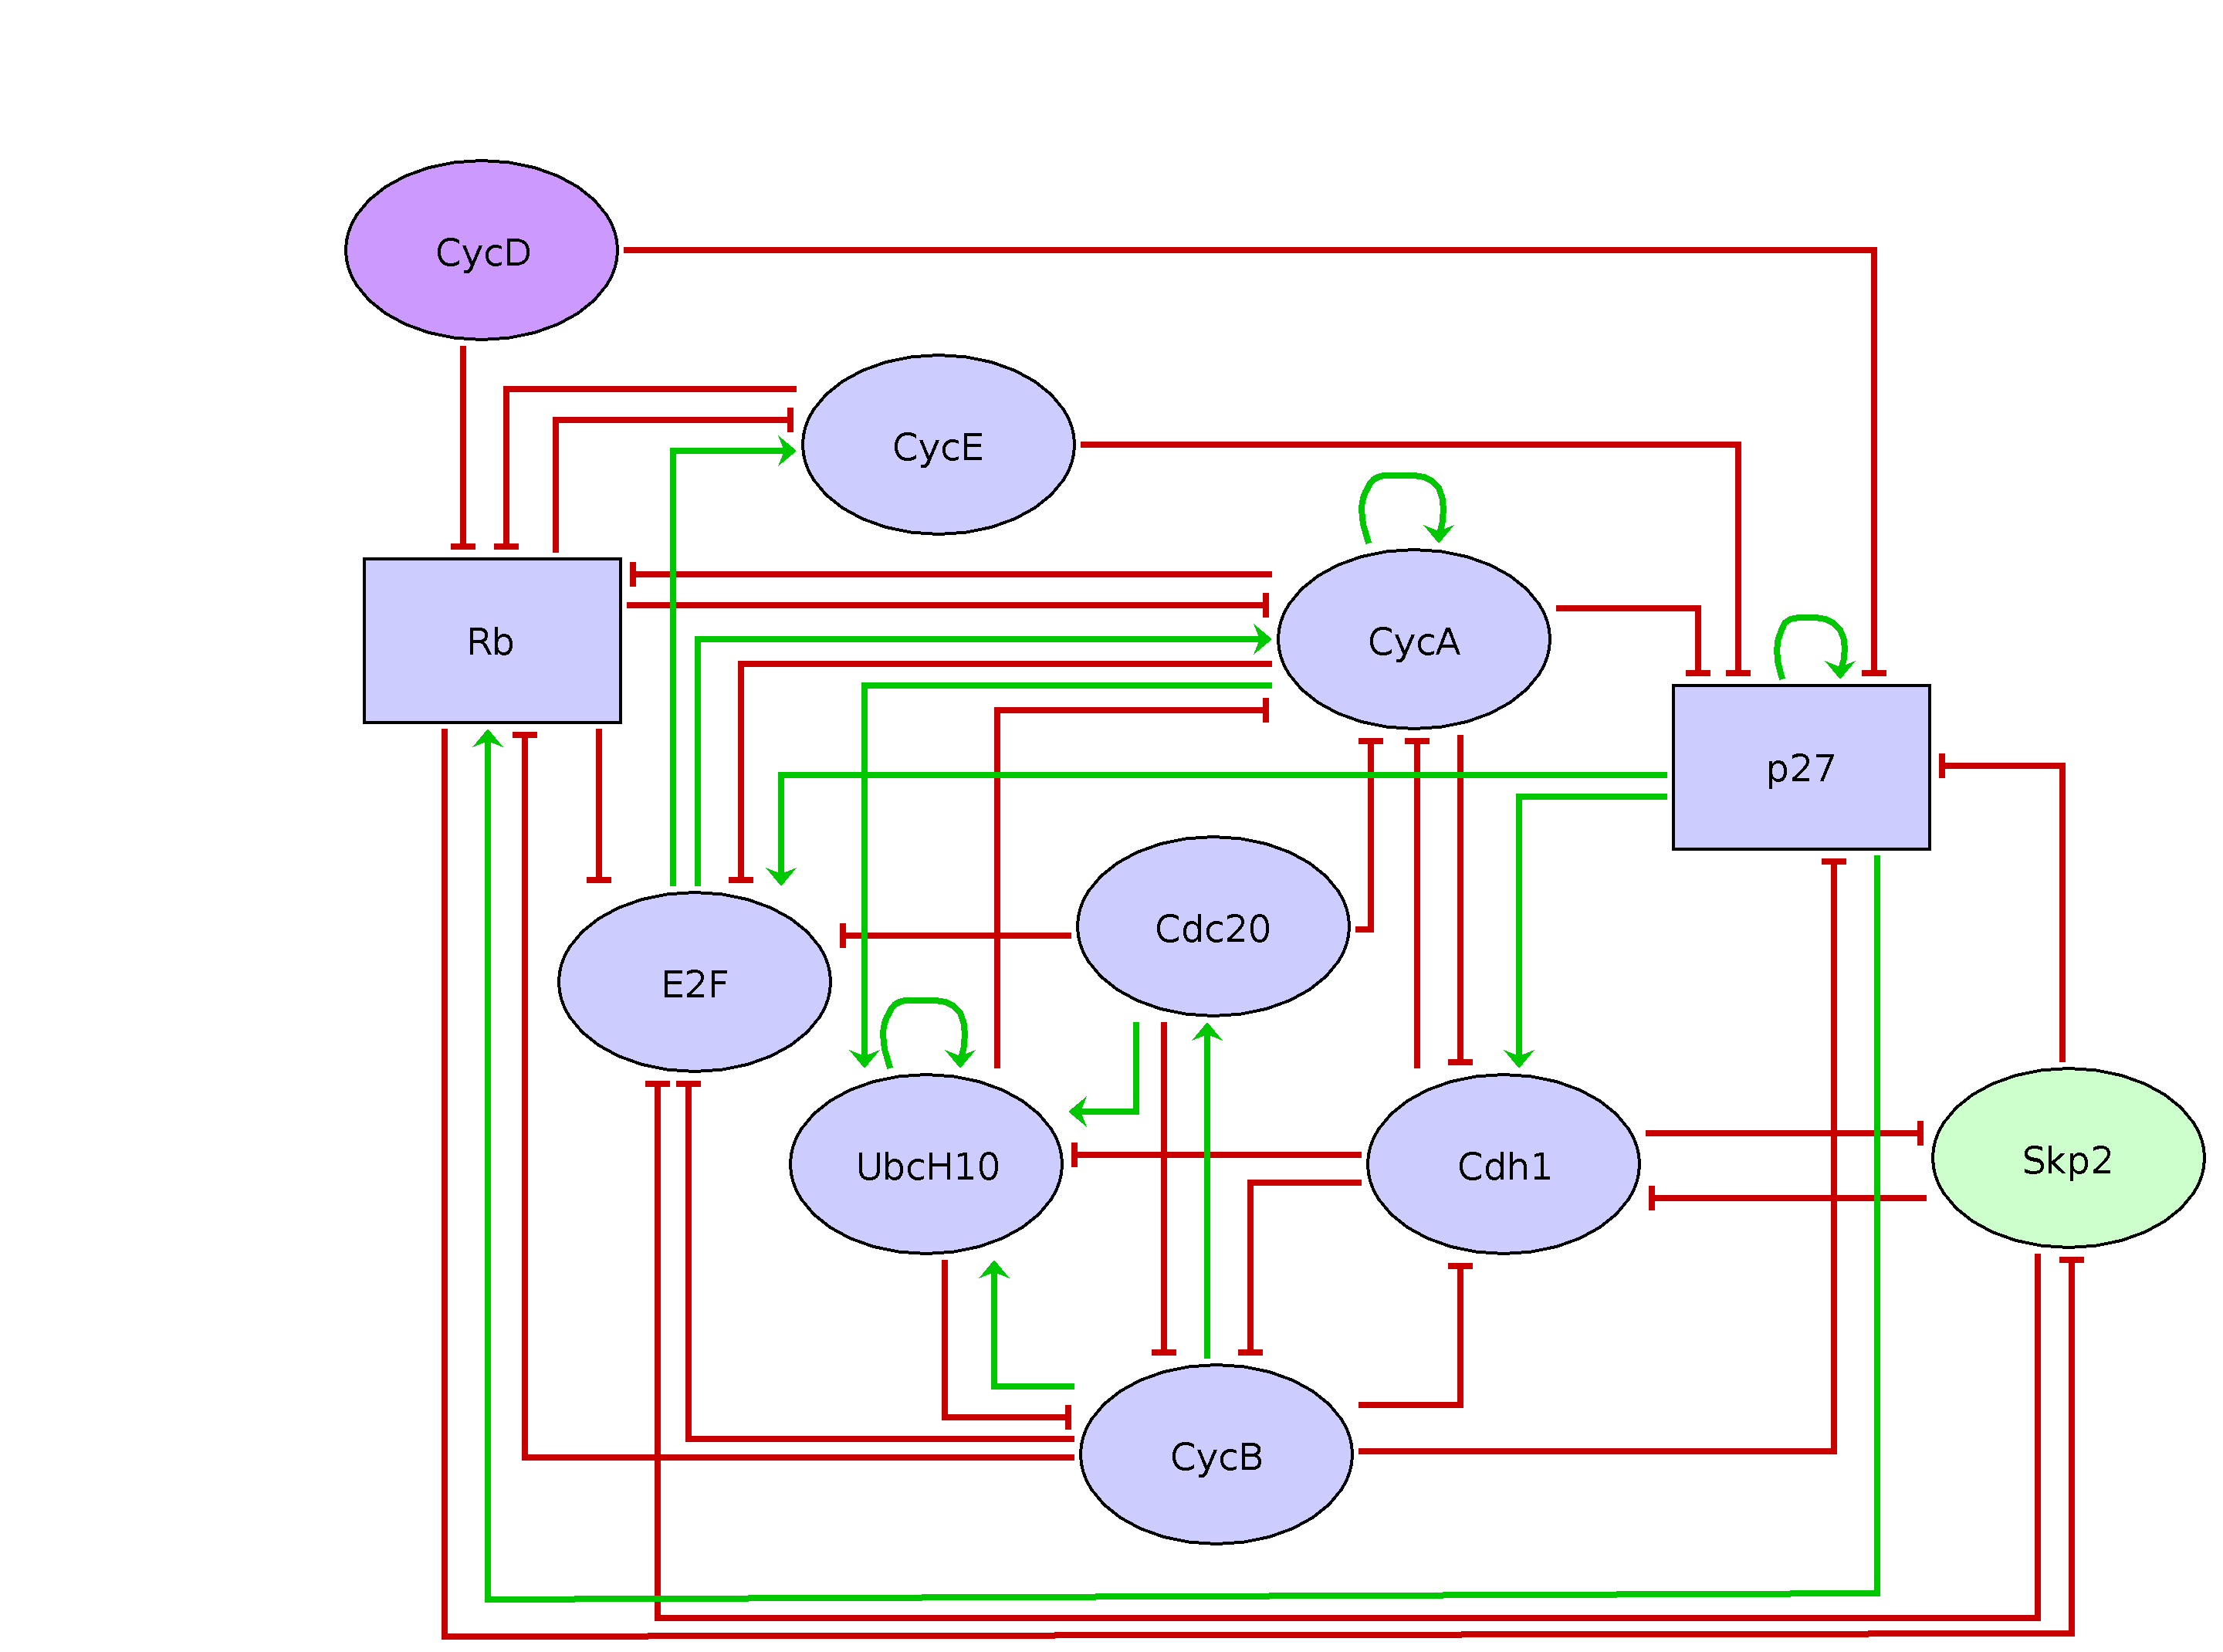

In [3]:
ginsim.show(lrg)

## Stable states analysis

In [4]:
import biolqm

First, we convert the GINsim model to bioLQM:

In [5]:
lqm = lrg.getModel()

In [6]:
fixpoints = biolqm.getTool("stable").getResult(lqm, "")
fixpoints

[JavaObject id=o7]

##### TODO
* see how https://www.py4j.org/py4j_java_protocol.html#py4j.protocol.register_output_converter may help
* or provide a dedicated method to output a python datastructure
* add ability to choose the solver (ASP/MDD)

## Trajectories analysis

In [7]:
from colomoto.temporal_logics import *

### States of interest

##### TODO
* How is the cycle generated?

In [8]:
cycle = S(CycD=1, Skp2=1) # & (S(..)  | S(...))

### Specification of temporal properties

##### TODO
* List and explain each properties

In [9]:
p1 = If(cycle, EF(S(p27=1)))

### Verification

We first convert the GINsim model to a NuSMV object:

In [10]:
smv = ginsim.to_nusmv(lrg)

Then, we append the temporal properties to check, optionnaly giving them a name:

In [11]:
smv.add_ctl(p1, name="p1")

Finally, the `verify` method will invoke the `NuSMV` model-checkers and returns the validity of each property.

In [12]:
res = smv.verify()
res

{'p1': True}

The `alltrue()` methods checks if all the properties have been validated.

In [13]:
res.alltrue()

True